# Figure 2: Mutational composition of the final populations

<div style="text-align: justify"> After the final populations were sequenced, we summarized the mutations impacting genes or nearby regulatory elements observed in our populations with a decorated heatmap. Each mutation type was color coded together with other samples annotations. The mutations were ordered by prevalence. 
 </div>

In [263]:
#Libraries
library("tidyverse")
library("ggpubr")
library("ComplexHeatmap")

source("../r/eefe_functions.R")

In [264]:
#Read and prepare the data
data=read.csv("../../data/mutations_populations.csv")
data = data %>% arrange(Population)
data = data %>% mutate(Strain = str_extract(Population,'[0-9][0-9][0-9]'))
head(data)

,Identifier,Gene,Mutation,Class,AF,Population,Strain
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<chr>
1,79,ycjW,frame,Small_indel,12.5,F606-1,606
2,83,lon,intergenic,Intergenic_snp,8.3,F606-1,606
3,84,lon,intergenic,Intergenic_snp,71.3,F606-1,606
4,88,dsdA,I265T,Non_Synonymous,6.1,F606-1,606
5,89,metA,I124L,Non_Synonymous,13.7,F606-1,606
6,92,mrdB,R208S,Non_Synonymous,57.6,F606-1,606


## Mutation statistics

In [265]:
# Create summary 
resum = as.data.frame(table(data$Population))
resum$Environment  = resum$Var1
resum$Lineage = resum$Var1
#
colnames(resum)[1]="Population"
colnames(resum)[2]="Mutations"
#Recode
resum$Environment = sub(resum$Environment,pattern="F.*",replacement = "Fast")
resum$Environment = sub(resum$Environment,pattern="R.*",replacement = "Random")
resum$Environment = sub(resum$Environment,pattern="S.*",replacement = "Slow")
resum$Lineage = sub(resum$Lineage,pattern="*.606.*",replacement = "606")
resum$Lineage = sub(resum$Lineage,pattern="*.607.*",replacement = "607")
resum$Both = paste(resum$Environment,resum$Lineage,sep=" ")
head(resum)

,Population,Mutations,Environment,Lineage,Both
,<fct>,<int>,<chr>,<chr>,<chr>
1,F606-1,7,Fast,606,Fast 606
2,F606-2,3,Fast,606,Fast 606
3,F606-3,5,Fast,606,Fast 606
4,F606-4,3,Fast,606,Fast 606
5,F607-1,5,Fast,607,Fast 607
6,F607-2,8,Fast,607,Fast 607


There is not enough power to establish any sort of bias in the number of mutations

In [266]:
compare_means(Mutations ~ Both,  data = resum,method = "t.test")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Mutations,Fast 606,Fast 607,0.23483289,1.00,0.235,ns,T-test
Mutations,Fast 606,Random 606,0.17074113,1.00,0.171,ns,T-test
Mutations,Fast 606,Random 607,0.63761809,1.00,0.638,ns,T-test
Mutations,Fast 606,Slow 606,0.05980680,0.84,0.060,ns,T-test
Mutations,Fast 606,Slow 607,0.25597450,1.00,0.256,ns,T-test
Mutations,Fast 607,Random 606,0.67621759,1.00,0.676,ns,T-test
Mutations,Fast 607,Random 607,0.29522894,1.00,0.295,ns,T-test
Mutations,Fast 607,Slow 606,0.89043561,1.00,0.890,ns,T-test
Mutations,Fast 607,Slow 607,0.81322323,1.00,0.813,ns,T-test


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


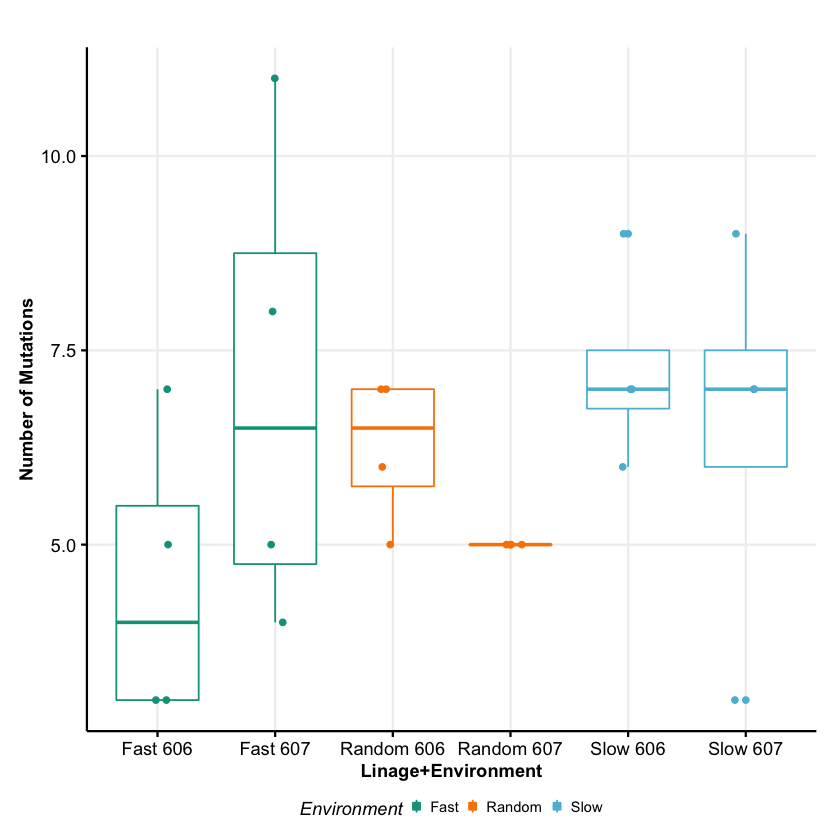

In [269]:
#pdf("Mutations_boxplot.pdf")
ggboxplot(resum, x = "Both", y = "Mutations",
          color = "Environment", palette = c("#00A08A",'#F98400','#5BBCD6')
              ,add="jitter")+
          ylab("Number of Mutations")+
          xlab("Linage+Environment")+
          font("x.text", size = 11)+font("y.text", size = 11)+theme_xp()
#dev.off()

In [270]:
# Add Environment
data$Environment = data$Population
data$Environment = sub(data$Environment,pattern="F.*",replacement = "Fast")
data$Environment = sub(data$Environment,pattern="R.*",replacement = "Random")
data$Environment = sub(data$Environment,pattern="S.*",replacement = "Slow")
head(data)

,Identifier,Gene,Mutation,Class,AF,Population,Strain,Environment
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<chr>,<chr>
1,79,ycjW,frame,Small_indel,12.5,F606-1,606,Fast
2,83,lon,intergenic,Intergenic_snp,8.3,F606-1,606,Fast
3,84,lon,intergenic,Intergenic_snp,71.3,F606-1,606,Fast
4,88,dsdA,I265T,Non_Synonymous,6.1,F606-1,606,Fast
5,89,metA,I124L,Non_Synonymous,13.7,F606-1,606,Fast
6,92,mrdB,R208S,Non_Synonymous,57.6,F606-1,606,Fast


In [271]:
data$Class = factor(data$Class, levels = c("Non_Synonymous", "Small_indel", "Intergenic_snp",
        'Stop','Synonymous','Large_deletion',"Large_amplification"))
data$ClassPlot = data$Class

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


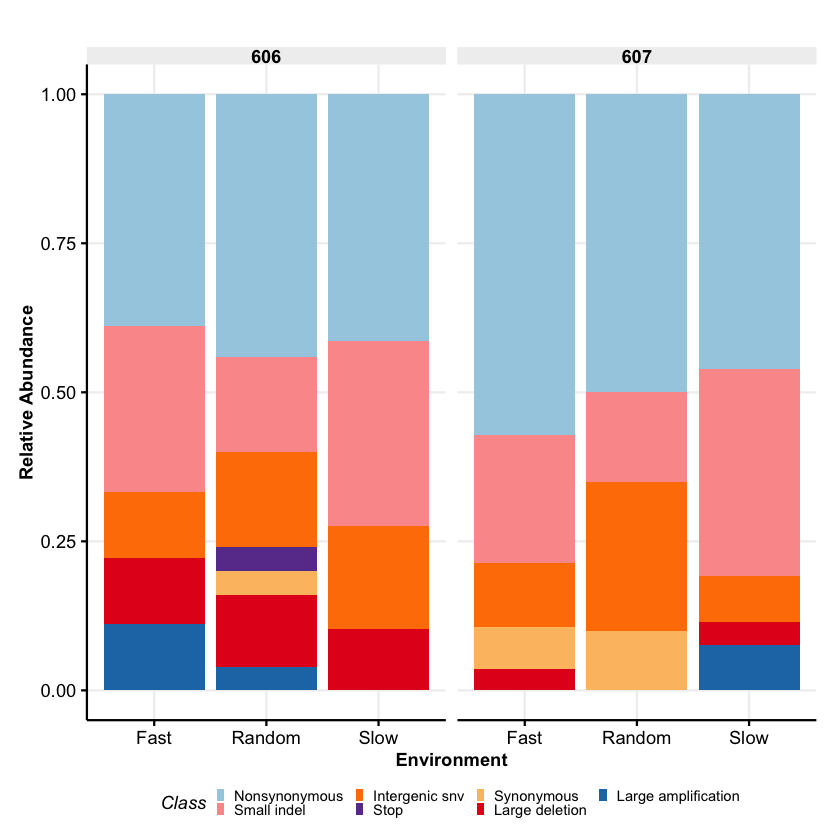

In [273]:
#pdf("BarplotMutationTypes.pdf")
ggplot(data) + aes(x = Environment, fill =Class)+
  geom_bar(position = "fill") + 
  scale_fill_manual(values= c("#A6CEE3", "#FB9A99",'#FF7F00',
        '#6A3D9A','#FDBF6F','#E31A1C',"#1F78B4"),
        labels= c("Nonsynonymous", "Small indel", "Intergenic snv",
        'Stop','Synonymous','Large deletion',"Large amplification")
                   ) + ylab("Relative Abundance") + 
  xlab("Environment")+facet_wrap("Strain")+
theme_xp()
#dev.off()

## Oncoprint

In [274]:
## Prepare the input
prepared = data %>% group_by(.dots=c("Population","Gene")) %>% mutate(collapsed=paste(Class, collapse = ';'))
prepared = prepared %>% select(Gene, Population, collapsed)
prepared = prepared %>% distinct()
prepmat = prepared %>% spread(Population,collapsed,fill="",drop=FALSE)
## Prepare the matrix
mat=as.matrix(prepmat)
rownames(mat) = mat[,1]
mat = mat[, -1]
#Order the matrix
logimat=!(mat == "")
#mat=mat[order(rowSums(logimat),decreasing=T),]
#Save the mutation
prepared$state="1"
mut_mat = prepared %>% spread(Population,state,fill="0",drop=T)
head(mut_mat)

Gene,collapsed,F606-1,F606-2,F606-3,F606-4,F607-1,F607-2,F607-3,F607-4,⋯,R607-3,R607-4,S606-1,S606-2,S606-3,S606-4,S607-1,S607-2,S607-3,S607-4
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
araB,Small_indel,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
cspA,Large_deletion,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
cspE/ccrB,Intergenic_snp,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
dacA,Non_Synonymous,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
deaD,Large_deletion,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
deaD,Non_Synonymous;Non_Synonymous,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [275]:
#Get the populations information
pheno = read.csv("../../data/sample_annotations.csv")
Environment=pheno$Environment
Linage = pheno$Linage
ha = HeatmapAnnotation(Environment = Environment, Linage= Linage,
                       col = list(Linage = c("606"='#446455',"607"='#C7B19C'),
                                  Environment = c("Fast" = "#00A08A", "Random" = '#F98400',
                                                  "Slow"='#5BBCD6')
                                 ),
                       annotation_height = unit(c(5, 5, 15), "mm"),
                       annotation_legend_param = list(legend_position = "bottom",Environment = list(title = "Environment"),Linage = list(title = "Linage")))

In [276]:
# Orders
StrainOrder = c(grep(colnames(mat), pattern = "R607"),
                grep(colnames(mat), pattern = "F607"),
                grep(colnames(mat), pattern = "S607"),
                grep(colnames(mat), pattern = "R606"),
                grep(colnames(mat), pattern = "F606"),
                grep(colnames(mat), pattern = "S606")) 

All mutation types: Non_Synonymous, Intergenic_snp, Small_indel,
Large_deletion, Large_amplification, Synonymous, Stop



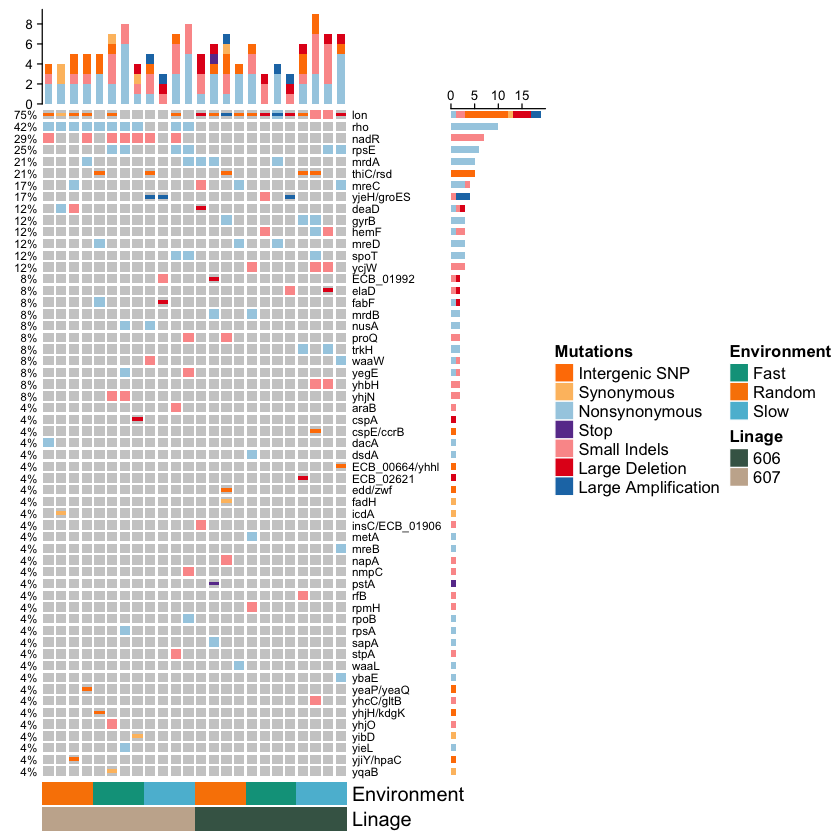

In [287]:
#OncoPrint
#pdf("Figure2.pdf")
oncoPrint(mat, column_order = StrainOrder,
          get_type = function(x) strsplit(x, ";")[[1]],
               alter_fun = alter_fun, col = col, 
               remove_empty_columns = TRUE,
               row_names_gp = gpar(fontsize = 7),
               heatmap_legend_param = list(title = "Mutations", 
               at = c("Intergenic_snp",'Synonymous',"Non_Synonymous", 'Stop', "Small_indel" ,
               'Large_deletion',"Large_amplification") , 
               labels = c("Intergenic SNP",'Synonymous',
                          "Nonsynonymous",'Stop', 
                          "Small Indels",'Large Deletion',
                          'Large Amplification')),
               bottom_annotation = ha,pct_gp = gpar(fontsize = 7),
               split = sample(c("606","607"), nrow(mat), replace = TRUE)
               
)
#dev.off()
